In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
# 서울시 장애인 총 인구 수 불러오기
disabled = pd.read_csv('[데이터] 서울시 내 각 구별 장애인 수 현황.csv')
disabled.head()

,기간,자치구,합계,합계.1,합계.2,장애유형,장애유형.1,장애유형.2,장애유형.3,장애유형.4,...,장애유형.35,장애유형.36,장애유형.37,장애유형.38,장애유형.39,장애유형.40,장애유형.41,장애유형.42,장애유형.43,장애유형.44
0,기간,자치구,합계,합계,합계,지체,지체,지체,뇌병변,뇌병변,...,간,안면,안면,안면,장루요루,장루요루,장루요루,뇌전증,뇌전증,뇌전증
1,기간,자치구,계,남자,여자,계,남자,여자,계,남자,...,여자,계,남자,여자,계,남자,여자,계,남자,여자
2,2020,서울시,"394,190","228,386","165,804","172,606","97,303","75,303","40,905","24,244",...,803,378,205,173,"2,901","1,796","1,105","1,251",685,566
3,2020,종로구,"6,015","3,488","2,527","2,586","1,388","1,198",582,371,...,12,7,4,3,31,21,10,11,4,7
4,2020,중구,"5,700","3,282","2,418","2,572","1,391","1,181",565,367,...,9,5,2,3,40,26,14,21,12,9


In [47]:
# 서울시 장애인 총 인구 수
disabled_seoul = disabled['합계'].values[2].replace(',', '')
disabled_seoul 

'394190'

In [48]:
# 서울 저상버스 운행 노선 수, 운행대수 불러오기
bus = pd.read_csv('[데이터] 서울특별시_저상버스 운행 노선수 및 운행대수.csv', index_col='구분', encoding='cp949')
bus

,총 대수,광역버스,저상버스,보유율
구분,,,,
노선 수,354,10,286,83.1
운행대수,7393,229,4272,59.6


In [84]:
# 분석에서 필요없는 '보유율' 열 삭제
bus = bus.drop(columns=['보유율'], axis=1)
bus

# 총 대수, 광역버스, 저상버스를 서울 장애인 수로 나누기
# 장애인 1만명 당 얼마만큼의 저상버스가 보급되어있는지 확인
bus_supply = bus / int(disabled_seoul) * 10000
bus_supply

,총 대수,광역버스,저상버스
구분,,,
노선 수,8.980441,0.253685,7.255384
운행대수,187.549151,5.809381,108.374134


In [86]:
# 컬럼명, 로우명 영문으로 변경
bus_supply.columns = ['total', 'red-bus(low-floor)', 'intra-city(low-floor)']
bus_supply.index = ['Number of routes', 'The number of buses']
bus_supply

,total,red-bus(low-floor),intra-city(low-floor)
Number of routes,8.980441,0.253685,7.255384
The number of buses,187.549151,5.809381,108.374134


<AxesSubplot:>

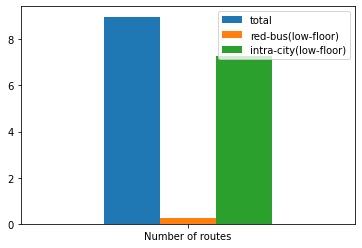

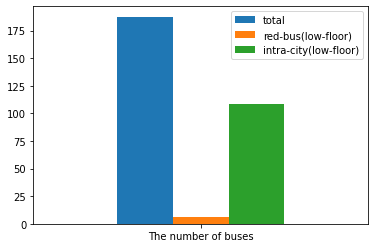

In [87]:
# 데이터 시각화 (막대그래프) - 로우별로 나타내기
bus_supply_1 = bus_supply.drop(index=['The number of buses'], axis=0)
bus_supply_2 = bus_supply.drop(index=['Number of routes'], axis=0)

bus_supply_1.plot.bar(rot=0)  # rot=0은 아래 x축 라벨 수평으로 만들어줌
bus_supply_2.plot.bar(rot=0)

#### (1) Number of routes (노선수)

- 장애인 1만명 당 이용할 수 있는 광역 저상버스의 노선 수는 1개도 되지 않음
- 장애인 1만명 당 이용할 수 있는 시내 저상버스의 노선 수는 7.26개
- 장애인 1만명 당 이용할 수 있는 서울 전체 노선 수가 9개라는 점에서 시내 저상버스의 노선 수는 보급이 잘 되고 있으나 광역버스는 턱없이 부족



#### (2) The number of buses (운행대수)

- 장애인 1만명 당 이용할 수 있는 광역 저상버스의 운행대수는 5.8대
- 장애인 1만명 당 이용할 수 있는 시내 저상버스의 운행대수는 108.37대
- 장애인 1만명 당 이용할 수 있는 서울 전체 버스의 운행대수가 187.55대라는 점에서 시내 저상버스는 절반보다 조금 많은 수치이고, 광역버스는 그에 비해 턱없이 부족한 숫자를 나타냄


`결국, 장애인들이 버스를 이용할 때, 저상버스만 이용해야 한다면 2대 중 1대는 그냥 보내야 하고, 광역버스의 경우에는 턱없이 부족한 모습을 보이고 있음. 장애인들도 차별없이 대중교통을 이용하기 위해서는 충분한 저상버스 확립이 필요함`